# IMPORTING Needed Packages :

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score

# EXTRACTING DATA IN CSV FORMAT :

In [2]:
df=pd.read_csv('D:\\Data Science\\files for pratice\\train-chennai-sale.csv')

# DATA CLEANSING & FILLING :

In [3]:
df.drop(columns=['PRT_ID','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS'],inplace=True)

In [4]:
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,8507000


In [5]:
def col(caps):
    cols=[i.lower() for i in caps.columns]
    caps.columns=cols
    return caps

In [6]:
df=col(df)

In [7]:
df

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,sales_price
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,8507000


In [8]:
df.isnull().sum()

area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        1
n_bathroom       5
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
sales_price      0
dtype: int64

In [9]:
df['n_bedroom'].fillna(df['n_bedroom'].mode()[0],inplace=True)
df['n_bathroom'].fillna(df['n_bathroom'].mode()[0],inplace=True)

In [10]:
df['date_sale']=pd.to_datetime(df['date_sale'])
df['date_build']=pd.to_datetime(df['date_build'])
df['n_bedroom']=df['n_bedroom'].astype(int)
df['n_bathroom']=df['n_bathroom'].astype(int)

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_14992\2919339520.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_sale']=pd.to_datetime(df['date_sale'])
C:\Users\Windows 11\AppData\Local\Temp\ipykernel_14992\2919339520.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_build']=pd.to_datetime(df['date_build'])


In [11]:
df['age']=df['date_sale'].dt.year - df['date_build'].dt.year

In [12]:
df

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,sales_price,age
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,7600000,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,21717770,11
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,9630290,22
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,5353000,49
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,1995-11-04,Others,NoSeWa,No Access,RH,10818480,9
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,1978-01-09,House,NoSeWa,Gravel,I,8351410,28
7107,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,8507000,32


In [13]:
obj_cols=[i for i in df.columns if df[i].dtype == 'object']

In [14]:
obj_cols

['area',
 'sale_cond',
 'park_facil',
 'buildtype',
 'utility_avail',
 'street',
 'mzzone']

In [15]:
for i in obj_cols:
    print(f'"{i}"is divided into "{len(df[i].value_counts())}"')

"area"is divided into "17"
"sale_cond"is divided into "9"
"park_facil"is divided into "3"
"buildtype"is divided into "5"
"utility_avail"is divided into "5"
"street"is divided into "5"
"mzzone"is divided into "6"


In [17]:
df['area'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: area, dtype: int64

In [18]:
df['sale_cond'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: sale_cond, dtype: int64

In [19]:
df['park_facil'].value_counts()

Yes    3587
No     3520
Noo       2
Name: park_facil, dtype: int64

In [20]:
df['buildtype'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: buildtype, dtype: int64

In [21]:
df['utility_avail'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: utility_avail, dtype: int64

In [22]:
df['street'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: street, dtype: int64

In [23]:
df['mzzone'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: mzzone, dtype: int64

In [24]:
df['area'] = df['area'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Velchery':'Velachery','Adyr':'Adyar','KKNagar':'KK Nagar'})

In [25]:
df['sale_cond'] = df['sale_cond'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'})

In [26]:
df['park_facil'] = df['park_facil'].replace({'Noo':'No'})

In [27]:
df['buildtype'] = df['buildtype'].replace({'Comercial':'Commercial','Other':'Others'})

In [28]:
df['utility_avail'] = df['utility_avail'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'])

In [29]:
df['street'] = df['street'].replace({'Pavd':'Paved','NoAccess':'No Access'})

# EDA(Exploratory Data Analysis) -
## VISUALIZATION :

C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows

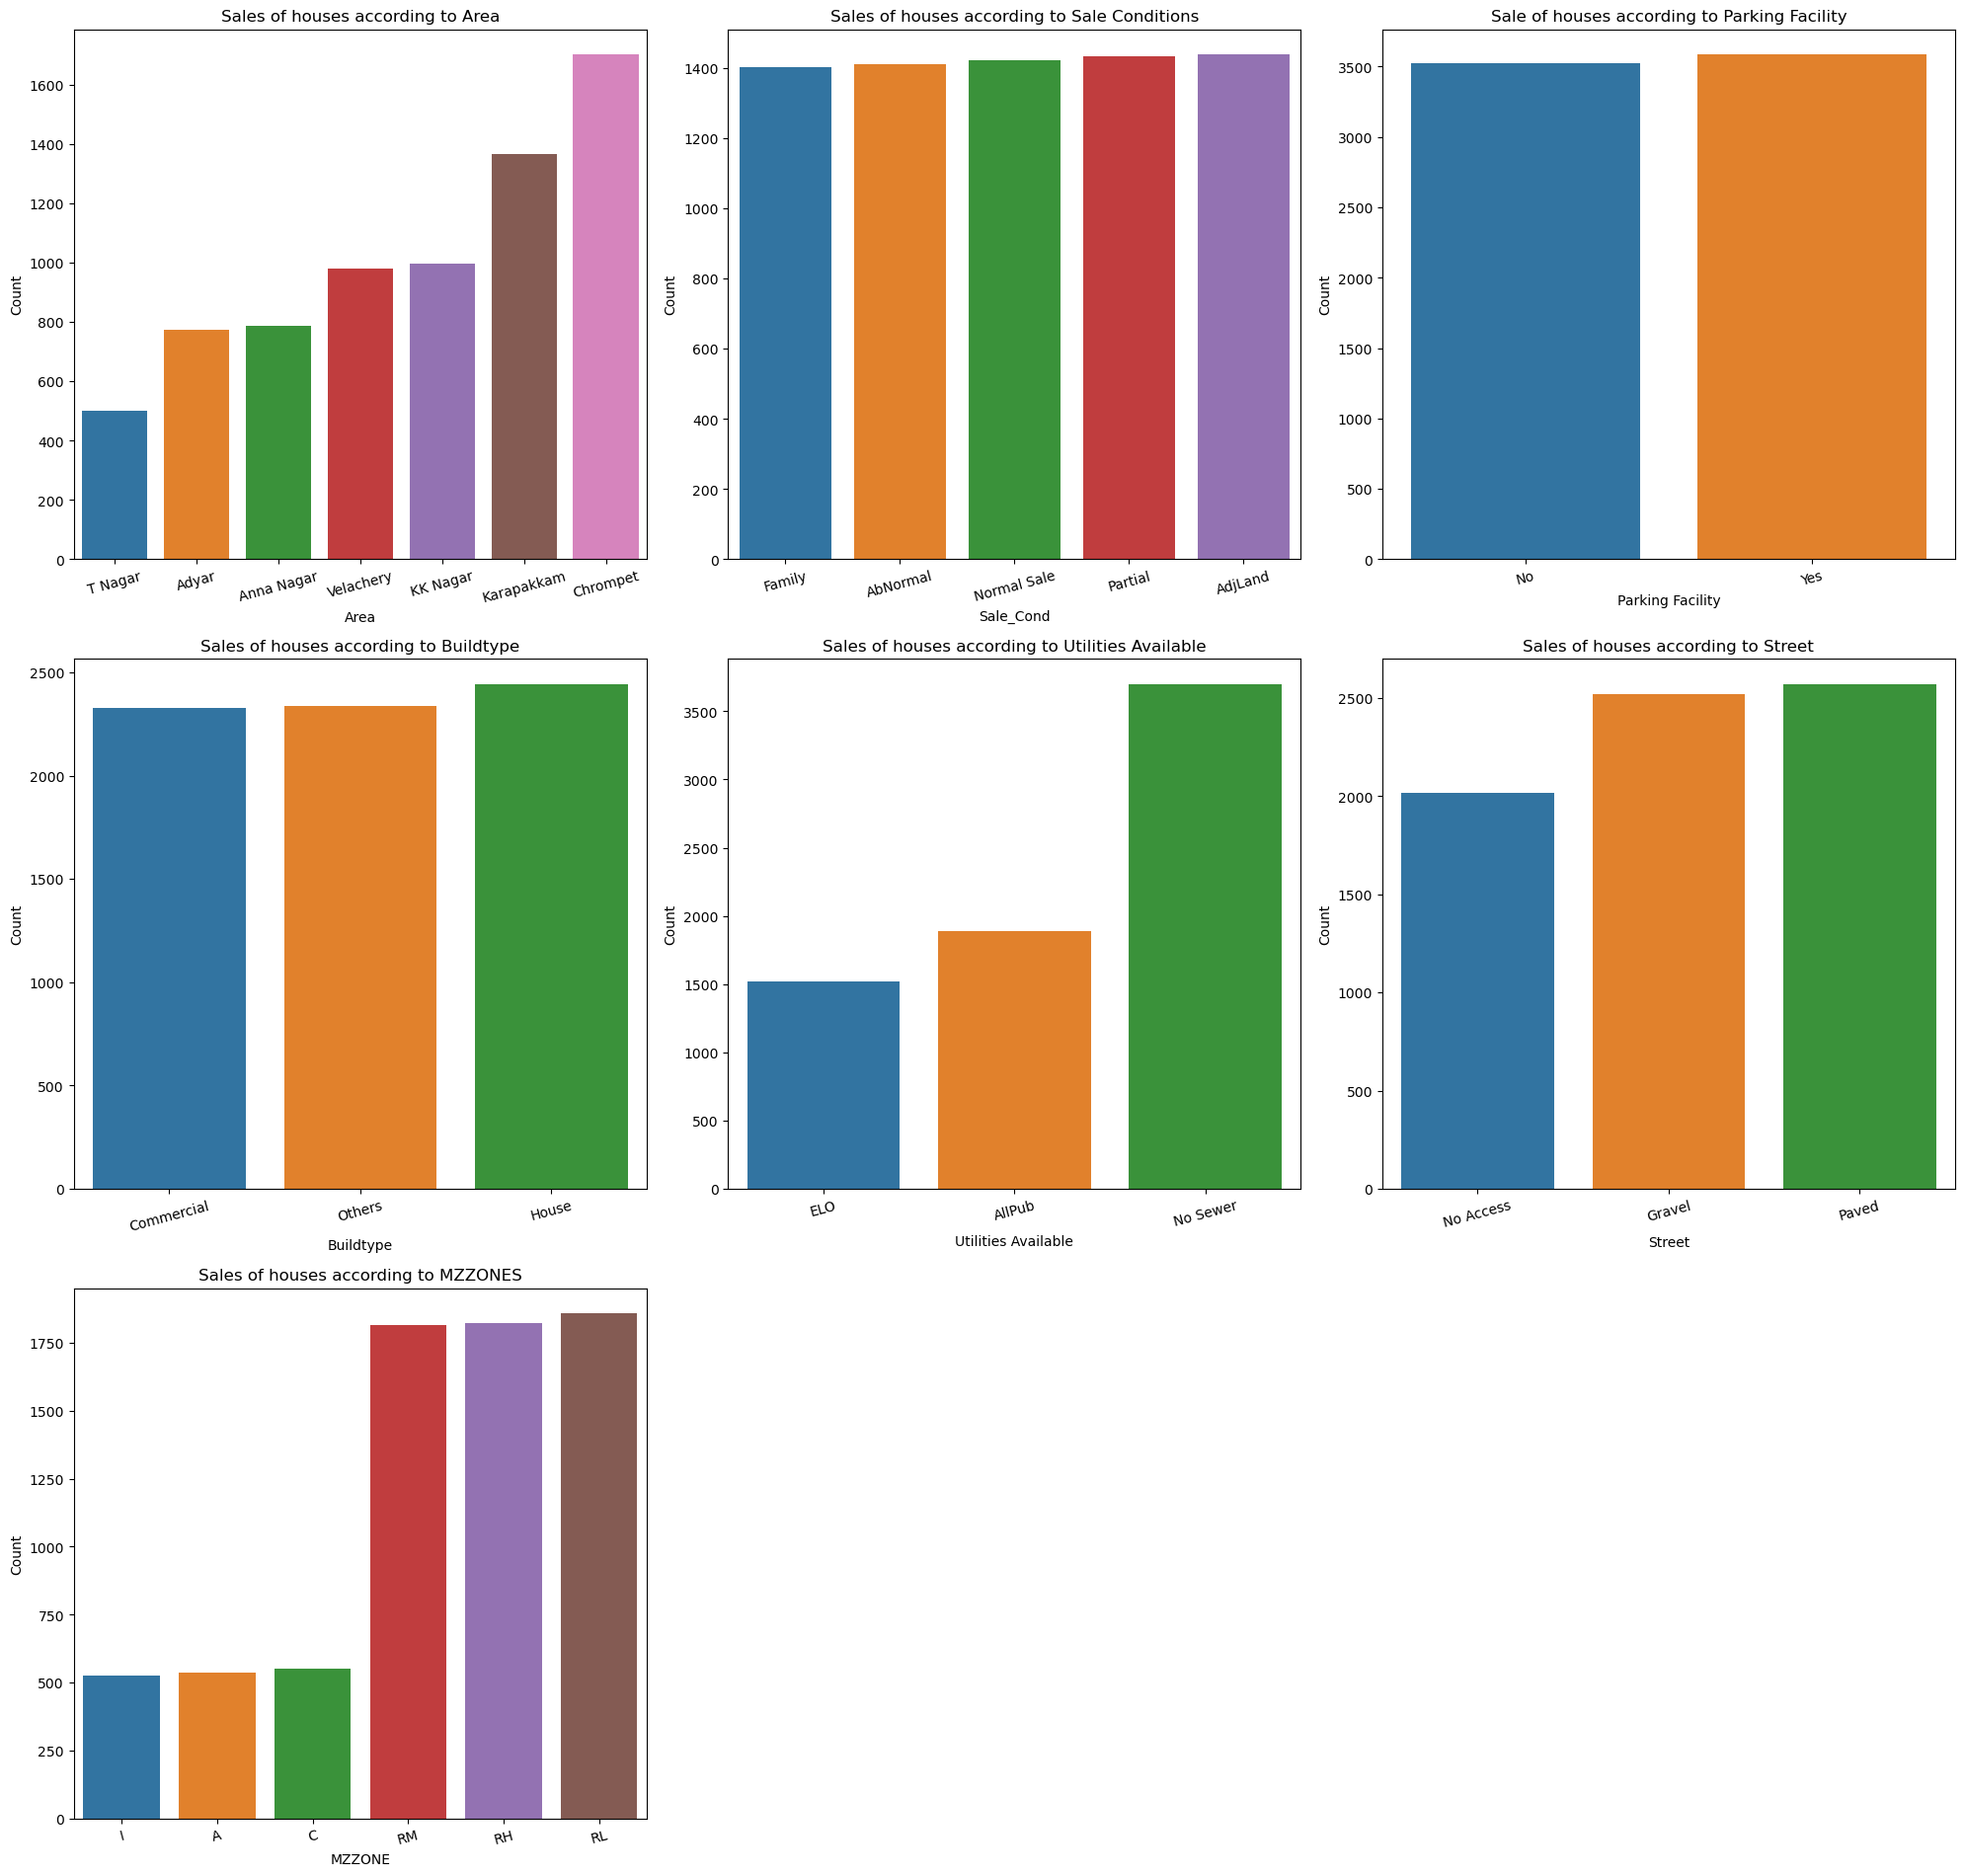

In [30]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['area'],order=df['area'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Sales of houses according to Area')

plt.subplot(432)
sns.countplot(df['sale_cond'],order=df['sale_cond'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Sale_Cond')
plt.ylabel('Count')
plt.title('Sales of houses according to Sale Conditions')

plt.subplot(433)
sns.countplot(df['park_facil'],order=df['park_facil'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Count')
plt.title('Sale of houses according to Parking Facility')

plt.subplot(434)
sns.countplot(df['buildtype'],order=df['buildtype'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Buildtype')
plt.ylabel('Count')
plt.title('Sales of houses according to Buildtype')

plt.subplot(435)
sns.countplot(df['utility_avail'],order=df['utility_avail'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Count')
plt.title('Sales of houses according to Utilities Available')

plt.subplot(436)
sns.countplot(df['street'],order=df['street'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Count')
plt.title('Sales of houses according to Street')

plt.subplot(437)
sns.countplot(df['mzzone'],order=df['mzzone'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Count')
plt.title('Sales of houses according to MZZONES')

plt.tight_layout()

In [31]:
#orders for all the barplots in ascending order
area_order = df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area']
sale_cond_order = df.groupby('sale_cond')['sales_price'].mean().reset_index().sort_values('sales_price')['sale_cond']
park_facil_order = df.groupby('park_facil')['sales_price'].mean().reset_index().sort_values('sales_price')['park_facil']
buildtype_order = df.groupby('buildtype')['sales_price'].mean().reset_index().sort_values('sales_price')['buildtype']
utility_avail_order = df.groupby('utility_avail')['sales_price'].mean().reset_index().sort_values('sales_price')['utility_avail']
street_order = df.groupby('street')['sales_price'].mean().reset_index().sort_values('sales_price')['street']
mzzone_order = df.groupby('mzzone')['sales_price'].mean().reset_index().sort_values('sales_price')['mzzone']

C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

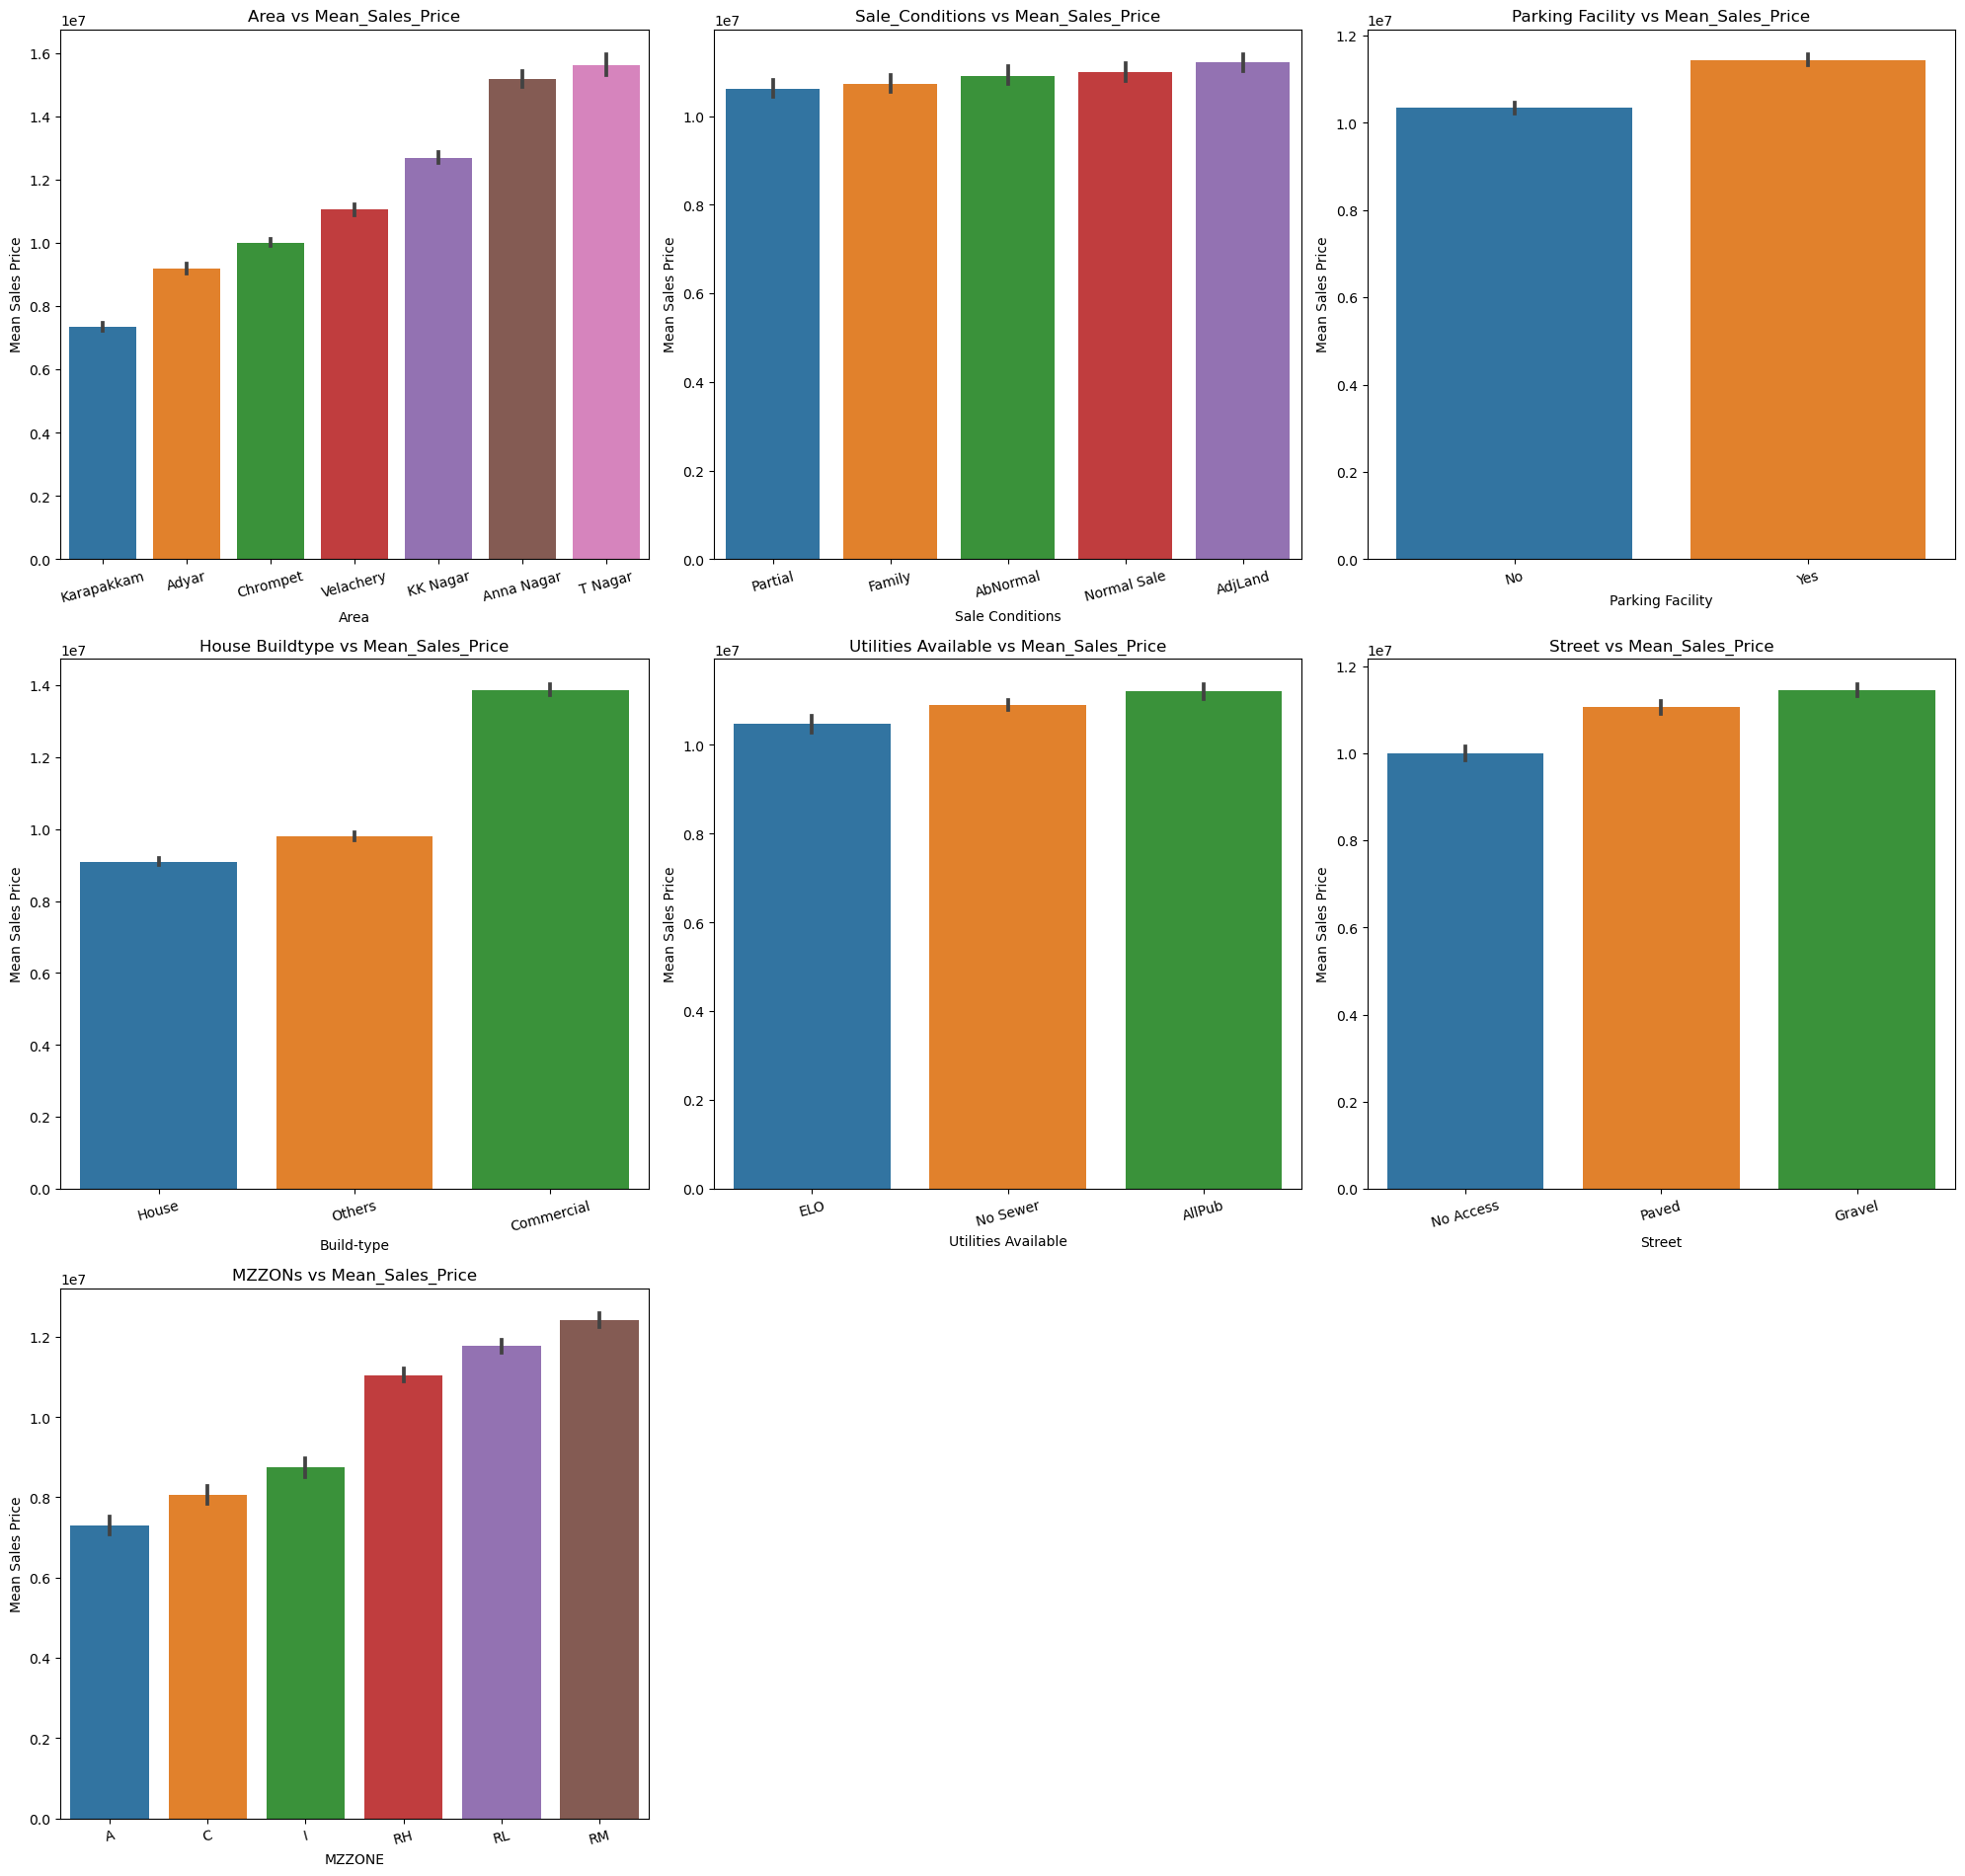

In [32]:
#for categorical columns
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['area'],df['sales_price'],order=area_order)
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Mean Sales Price')
plt.title('Area vs Mean_Sales_Price')

plt.subplot(432)
sns.barplot(df['sale_cond'],df['sales_price'],order=sale_cond_order)
plt.xticks(rotation=15)
plt.xlabel('Sale Conditions')
plt.ylabel('Mean Sales Price')
plt.title('Sale_Conditions vs Mean_Sales_Price')

plt.subplot(433)
sns.barplot(df['park_facil'],df['sales_price'],order=park_facil_order)
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Mean Sales Price')
plt.title('Parking Facility vs Mean_Sales_Price')

plt.subplot(434)
sns.barplot(df['buildtype'],df['sales_price'],order=buildtype_order)
plt.xticks(rotation=15)
plt.xlabel('Build-type')
plt.ylabel('Mean Sales Price')
plt.title('House Buildtype vs Mean_Sales_Price')

plt.subplot(435)
sns.barplot(df['utility_avail'],df['sales_price'],order=utility_avail_order)
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Mean Sales Price')
plt.title('Utilities Available vs Mean_Sales_Price')

plt.subplot(436)
sns.barplot(df['street'],df['sales_price'],order=street_order)
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Mean Sales Price')
plt.title('Street vs Mean_Sales_Price')

plt.subplot(437)
sns.barplot(df['mzzone'],df['sales_price'],order=mzzone_order)
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Mean Sales Price')
plt.title('MZZONs vs Mean_Sales_Price')

plt.tight_layout()

# PREPROCESSING -
## ENCODING :

In [33]:
df['area'] = df['area'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
df['street'] = df['street'].map({'No Access':0,'Paved':1,'Gravel':2})
df['mzzone'] = df['mzzone'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})
df['park_facil'] = df['park_facil'].map({'No':0,'Yes':1})
df = pd.get_dummies(df, columns = ['buildtype'])
df['utility_avail'] = df['utility_avail'].map({'ELO':0,'No Sewer':1,'AllPub':2})

In [34]:
df

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,utility_avail,street,mzzone,sales_price,age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,2011-04-05,131,1,1,3,AbNormal,1,1967-05-15,2,1,0,7600000,44,1,0,0
1,5,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,2,2,4,21717770,11,1,0,0
2,1,909,2012-04-02,70,1,1,3,AbNormal,1,1992-09-02,0,2,5,13159200,20,1,0,0
3,3,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,1,1,2,9630290,22,0,0,1
4,0,1226,2009-05-10,84,1,1,3,AbNormal,1,1979-10-13,2,2,1,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,2011-03-01,51,1,1,2,AdjLand,0,1962-01-15,0,0,6,5353000,49,0,0,1
7105,3,1897,2004-08-04,52,3,2,5,Family,1,1995-11-04,1,0,4,10818480,9,0,0,1
7106,3,1614,2006-08-25,152,2,1,4,Normal Sale,0,1978-01-09,1,2,2,8351410,28,0,1,0
7107,0,787,2009-03-08,40,1,1,2,Partial,1,1977-11-08,0,1,5,8507000,32,1,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   area                  7109 non-null   int64         
 1   int_sqft              7109 non-null   int64         
 2   date_sale             7109 non-null   datetime64[ns]
 3   dist_mainroad         7109 non-null   int64         
 4   n_bedroom             7109 non-null   int32         
 5   n_bathroom            7109 non-null   int32         
 6   n_room                7109 non-null   int64         
 7   sale_cond             7109 non-null   object        
 8   park_facil            7109 non-null   int64         
 9   date_build            7109 non-null   datetime64[ns]
 10  utility_avail         7109 non-null   int64         
 11  street                7109 non-null   int64         
 12  mzzone                7109 non-null   int64         
 13  sales_price       

# SPLITTING :

In [36]:
x= df.drop(columns=['sales_price','date_sale','dist_mainroad','date_sale','date_build','sale_cond'])
y=df['sales_price']

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   area                  7109 non-null   int64
 1   int_sqft              7109 non-null   int64
 2   n_bedroom             7109 non-null   int32
 3   n_bathroom            7109 non-null   int32
 4   n_room                7109 non-null   int64
 5   park_facil            7109 non-null   int64
 6   utility_avail         7109 non-null   int64
 7   street                7109 non-null   int64
 8   mzzone                7109 non-null   int64
 9   age                   7109 non-null   int64
 10  buildtype_Commercial  7109 non-null   uint8
 11  buildtype_House       7109 non-null   uint8
 12  buildtype_Others      7109 non-null   uint8
dtypes: int32(2), int64(8), uint8(3)
memory usage: 520.8 KB


In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=70)

# MACHINE LEARNING MODEL SELECTION -
## LINEAR REGRESSION :

In [39]:
l=LinearRegression()

In [40]:
l.fit(xtrain,ytrain)

LinearRegression()

In [41]:
l1=l.predict(xtest)

In [42]:
l1

array([ 8974364.46736187, 13851861.87193011,  6369879.18744922, ...,
        7156139.42087005,  8376667.33919884,  8870936.08863072])

In [43]:
lr2score=r2_score(ytest,l1)

In [44]:
lr2score

0.9188680933629556

In [45]:
lcrossvalscore=cross_val_score(l,xtrain,ytrain,cv=10).mean()

In [46]:
lcrossvalscore

0.9182225600099724

In [47]:
l.score(xtest,ytest)

0.9188680933629556

# SCALING :

In [48]:
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

# KNeighborsRegressor : 

In [49]:
kvalue=np.arange(1,20)
kcrossvalscore=[]
for k in kvalue:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    print('kvalue',k,'train score',knn.score(xtrain,ytrain),'crossscore :',cross_val_score(knn,xtrain,ytrain,cv=10).mean())
    kcrossvalscore.append(cross_val_score(knn,xtrain,ytrain,cv=10).mean())

kvalue 1 train score 0.9999998555757502 crossscore : 0.935478910733831
kvalue 2 train score 0.9845345813877647 crossscore : 0.9475604597001525
kvalue 3 train score 0.9779851474056956 crossscore : 0.9497122022867845
kvalue 4 train score 0.9737726007322949 crossscore : 0.9506148908391333
kvalue 5 train score 0.9702118917794198 crossscore : 0.9510744290956744
kvalue 6 train score 0.9679932718413263 crossscore : 0.9506993228196283
kvalue 7 train score 0.9660578648381433 crossscore : 0.9502138601752362
kvalue 8 train score 0.9640037593601248 crossscore : 0.9494626176893328
kvalue 9 train score 0.9622110109272817 crossscore : 0.949245430126512
kvalue 10 train score 0.9608971130837285 crossscore : 0.9486329300044607
kvalue 11 train score 0.959645772367955 crossscore : 0.9478217429407575
kvalue 12 train score 0.9583573343022298 crossscore : 0.946826663866011
kvalue 13 train score 0.9570446590181703 crossscore : 0.9457339031531353
kvalue 14 train score 0.9559619754620681 crossscore : 0.94503371

In [50]:
max(kcrossvalscore)

0.9510744290956744

# IMPLEMENTING KNeighborsRegressor :

In [51]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [52]:
knn1=knn.predict(xtest)

In [53]:
knnr2score=r2_score(ytest,knn1)

In [54]:
knnr2score

0.9515293306420143

In [55]:
knn.score(xtest,ytest)

0.9515293306420143

In [56]:
knncrossvalscore=cross_val_score(knn,xtrain,ytrain,cv=10).mean()

In [57]:
knncrossvalscore

0.9510744290956744

# DecisionTreeRegressor :

In [58]:
dvalue=np.arange(1,20)
dcrossvalscore=[]
for m in dvalue:
    d=DecisionTreeRegressor(max_depth=m,random_state=54)
    d.fit(xtrain,ytrain)
    print(f'dval:"{m}" for train score :"{d.score(xtrain,ytrain)}"crossvalscore :"{cross_val_score(d,xtrain,ytrain,cv=10).mean()}"')
    dcrossvalscore.append(cross_val_score(d,xtrain,ytrain,cv=10).mean())

dval:"1" for train score :"0.36469532366282975"crossvalscore :"0.36338762104898076"
dval:"2" for train score :"0.6851864361873672"crossvalscore :"0.6841254041470958"
dval:"3" for train score :"0.8059138455015753"crossvalscore :"0.804870076081903"
dval:"4" for train score :"0.8880433266342693"crossvalscore :"0.8844383679340944"
dval:"5" for train score :"0.9229691020685638"crossvalscore :"0.9175201705623971"
dval:"6" for train score :"0.9442110799931962"crossvalscore :"0.9378893728412517"
dval:"7" for train score :"0.9602983589768224"crossvalscore :"0.9503374133733054"
dval:"8" for train score :"0.9727459085329719"crossvalscore :"0.9605104758958063"
dval:"9" for train score :"0.9823822856979512"crossvalscore :"0.9676534384848894"
dval:"10" for train score :"0.989129881693097"crossvalscore :"0.9711529051303307"
dval:"11" for train score :"0.9936304411778448"crossvalscore :"0.9730009489815631"
dval:"12" for train score :"0.9967270110566523"crossvalscore :"0.9731994059170519"
dval:"13" for

In [59]:
max(dcrossvalscore)

0.9735999611229131

# IMPLEMENTING DecisionTreeRegressor :

In [60]:
d=DecisionTreeRegressor(max_depth=18,random_state=54)
d.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=18, random_state=54)

In [61]:
d1=d.predict(xtest)

In [62]:
dr2score=r2_score(ytest,d1)

In [63]:
dr2score

0.9742364252158456

In [64]:
d.score(xtest,ytest)

0.9742364252158456

In [65]:
dcrossvalscore=cross_val_score(d,xtrain,ytrain,cv=10).mean()

In [66]:
dcrossvalscore

0.9735999611229131

# RandomForestRegressor :

In [67]:
rvalue=np.array([1,2,3,6,8,12,15,29,30])
rcrossval=[]
for mm in rvalue:
    r=RandomForestRegressor(max_depth=mm,random_state=5325)
    r.fit(xtrain,ytrain)
    print('rvalue',mm,'trainvale',r.score(xtrain,ytrain),'crossvalscore',cross_val_score(r,xtrain,ytrain,cv=10).mean())
    rcrossval.append(cross_val_score(r,xtrain,ytrain,cv=10).mean())

rvalue 1 trainvale 0.3646923744817584 crossvalscore 0.3633587667543731
rvalue 2 trainvale 0.6851851010369887 crossvalscore 0.6840983299196667
rvalue 3 trainvale 0.8123843684706541 crossvalscore 0.8129998882659528
rvalue 6 trainvale 0.9567742861125457 crossvalscore 0.9515821861916549
rvalue 8 trainvale 0.9828287579749778 crossvalscore 0.9760736790996238
rvalue 12 trainvale 0.9973544425661435 crossvalscore 0.9879041713320463
rvalue 15 trainvale 0.9983663061883009 crossvalscore 0.9884050109066435
rvalue 29 trainvale 0.9984419272794746 crossvalscore 0.9884379503223755
rvalue 30 trainvale 0.9984419272794746 crossvalscore 0.9884379503223755


In [68]:
max(rcrossval)

0.9884379503223755

# IMPLEMENTING RandomForestRegressor :

In [69]:
r=RandomForestRegressor(max_depth=30,random_state=5325)
r.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=30, random_state=5325)

In [70]:
r1=r.predict(xtest)

In [71]:
rr2score=r2_score(ytest,r1)

In [72]:
rr2score

0.9889863065982625

In [73]:
r.score(xtest,ytest)

0.9889863065982625

In [74]:
rcrossvalscore=cross_val_score(r,xtrain,ytrain,cv=10).mean()

In [75]:
rcrossvalscore

0.9884379503223755

# xgboost - XGBRegressor :

In [76]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [77]:
import xgboost as xgb

In [78]:
lrvalue=np.array([0.01,0.05,0.09,0.15,0.26,0.36,0.45,0.56,0.65,0.76,0.85,0.99])
crossval=[]
for lr in lrvalue:
                 x=xgb.XGBRegressor(learning_rate=lr,n_estimators=100)
                 x.fit(xtrain,ytrain)
                 print('lrvalue:',lr,'train score:',x.score(xtrain,ytrain),'crossvalscore:',cross_val_score(x,xtrain,ytrain,cv=10).mean())
                 crossval.append(cross_val_score(x,xtrain,ytrain,cv=10).mean())

lrvalue: 0.01 train score: 0.8263411268169712 crossvalscore: 0.8218014168048846
lrvalue: 0.05 train score: 0.9943316190999781 crossvalscore: 0.9906637382876926
lrvalue: 0.09 train score: 0.9969261887566713 crossvalscore: 0.9936331909991475
lrvalue: 0.15 train score: 0.9975982179271313 crossvalscore: 0.9939676574039418
lrvalue: 0.26 train score: 0.9981116166720133 crossvalscore: 0.9934124165640617
lrvalue: 0.36 train score: 0.998404031246943 crossvalscore: 0.9925768208937755
lrvalue: 0.45 train score: 0.9986277587827126 crossvalscore: 0.9915778835306538
lrvalue: 0.56 train score: 0.9989156265413076 crossvalscore: 0.9901967368086805
lrvalue: 0.65 train score: 0.9988804767954506 crossvalscore: 0.9890924166179736
lrvalue: 0.76 train score: 0.9991475386608891 crossvalscore: 0.9867000672776918
lrvalue: 0.85 train score: 0.9991540716221026 crossvalscore: 0.9861716729359852
lrvalue: 0.99 train score: 0.9992985677332743 crossvalscore: 0.9835575868660318


In [79]:
max(crossval)

0.9939676574039418

# IMPLEMENTING xgboost - XGBRegressor :

In [80]:
x=xgb.XGBRegressor(learning_rate=0.15,n_estimators=100)
x.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [81]:
x1=x.predict(xtest)

In [82]:
xr2score=r2_score(ytest,x1)

In [83]:
xr2score

0.9942573695555189

In [84]:
x.score(xtest,ytest)

0.9942573695555189

In [85]:
xcrossvalscore=cross_val_score(x,xtrain,ytrain,cv=10).mean()

In [86]:
xcrossvalscore

0.9939676574039418

# CROSS VALUE SCORE OF MACHINE LEARNING MODELS :

In [87]:
print('crossvalue score for linear regressor :',lcrossvalscore)
print('crossvalue score for knn regressor :',knncrossvalscore)
print('crossvalue score for Decision Tree regressor :',dcrossvalscore)
print('crossvalue score for Random forest regressor :',rcrossvalscore)
print('crossvalue score for ExtremeGradientBoosting regressor :',xcrossvalscore)

crossvalue score for linear regressor : 0.9182225600099724
crossvalue score for knn regressor : 0.9510744290956744
crossvalue score for Decision Tree regressor : 0.9735999611229131
crossvalue score for Random forest regressor : 0.9884379503223755
crossvalue score for ExtremeGradientBoosting regressor : 0.9939676574039418


# R2 SCORE OF MACHINE LEARNING MODELS :

In [88]:
print('r2_score score for linear regressor :',lr2score)
print('r2_score score for knn regressor :',knnr2score)
print('r2_score score for Decision Tree regressor :',dr2score)
print('r2_score score for Random forest regressor :',rr2score)
print('r2_score score for ExtremeGradientBoosting regressor :',xr2score)

r2_score score for linear regressor : 0.9188680933629556
r2_score score for knn regressor : 0.9515293306420143
r2_score score for Decision Tree regressor : 0.9742364252158456
r2_score score for Random forest regressor : 0.9889863065982625
r2_score score for ExtremeGradientBoosting regressor : 0.9942573695555189


# The best model depending on the cross validation score is found out to be the ExtremeGradientBoosting regressor.

# IMPORTANT FEATURES :

In [89]:
x.feature_importances_

array([2.3726490e-01, 1.8545095e-02, 6.0892239e-02, 2.9909979e-03,
       1.0975190e-01, 1.2815560e-02, 8.0814131e-04, 8.8640777e-03,
       2.0572644e-02, 1.1327618e-03, 5.1510870e-01, 1.1132689e-02,
       1.2026492e-04], dtype=float32)

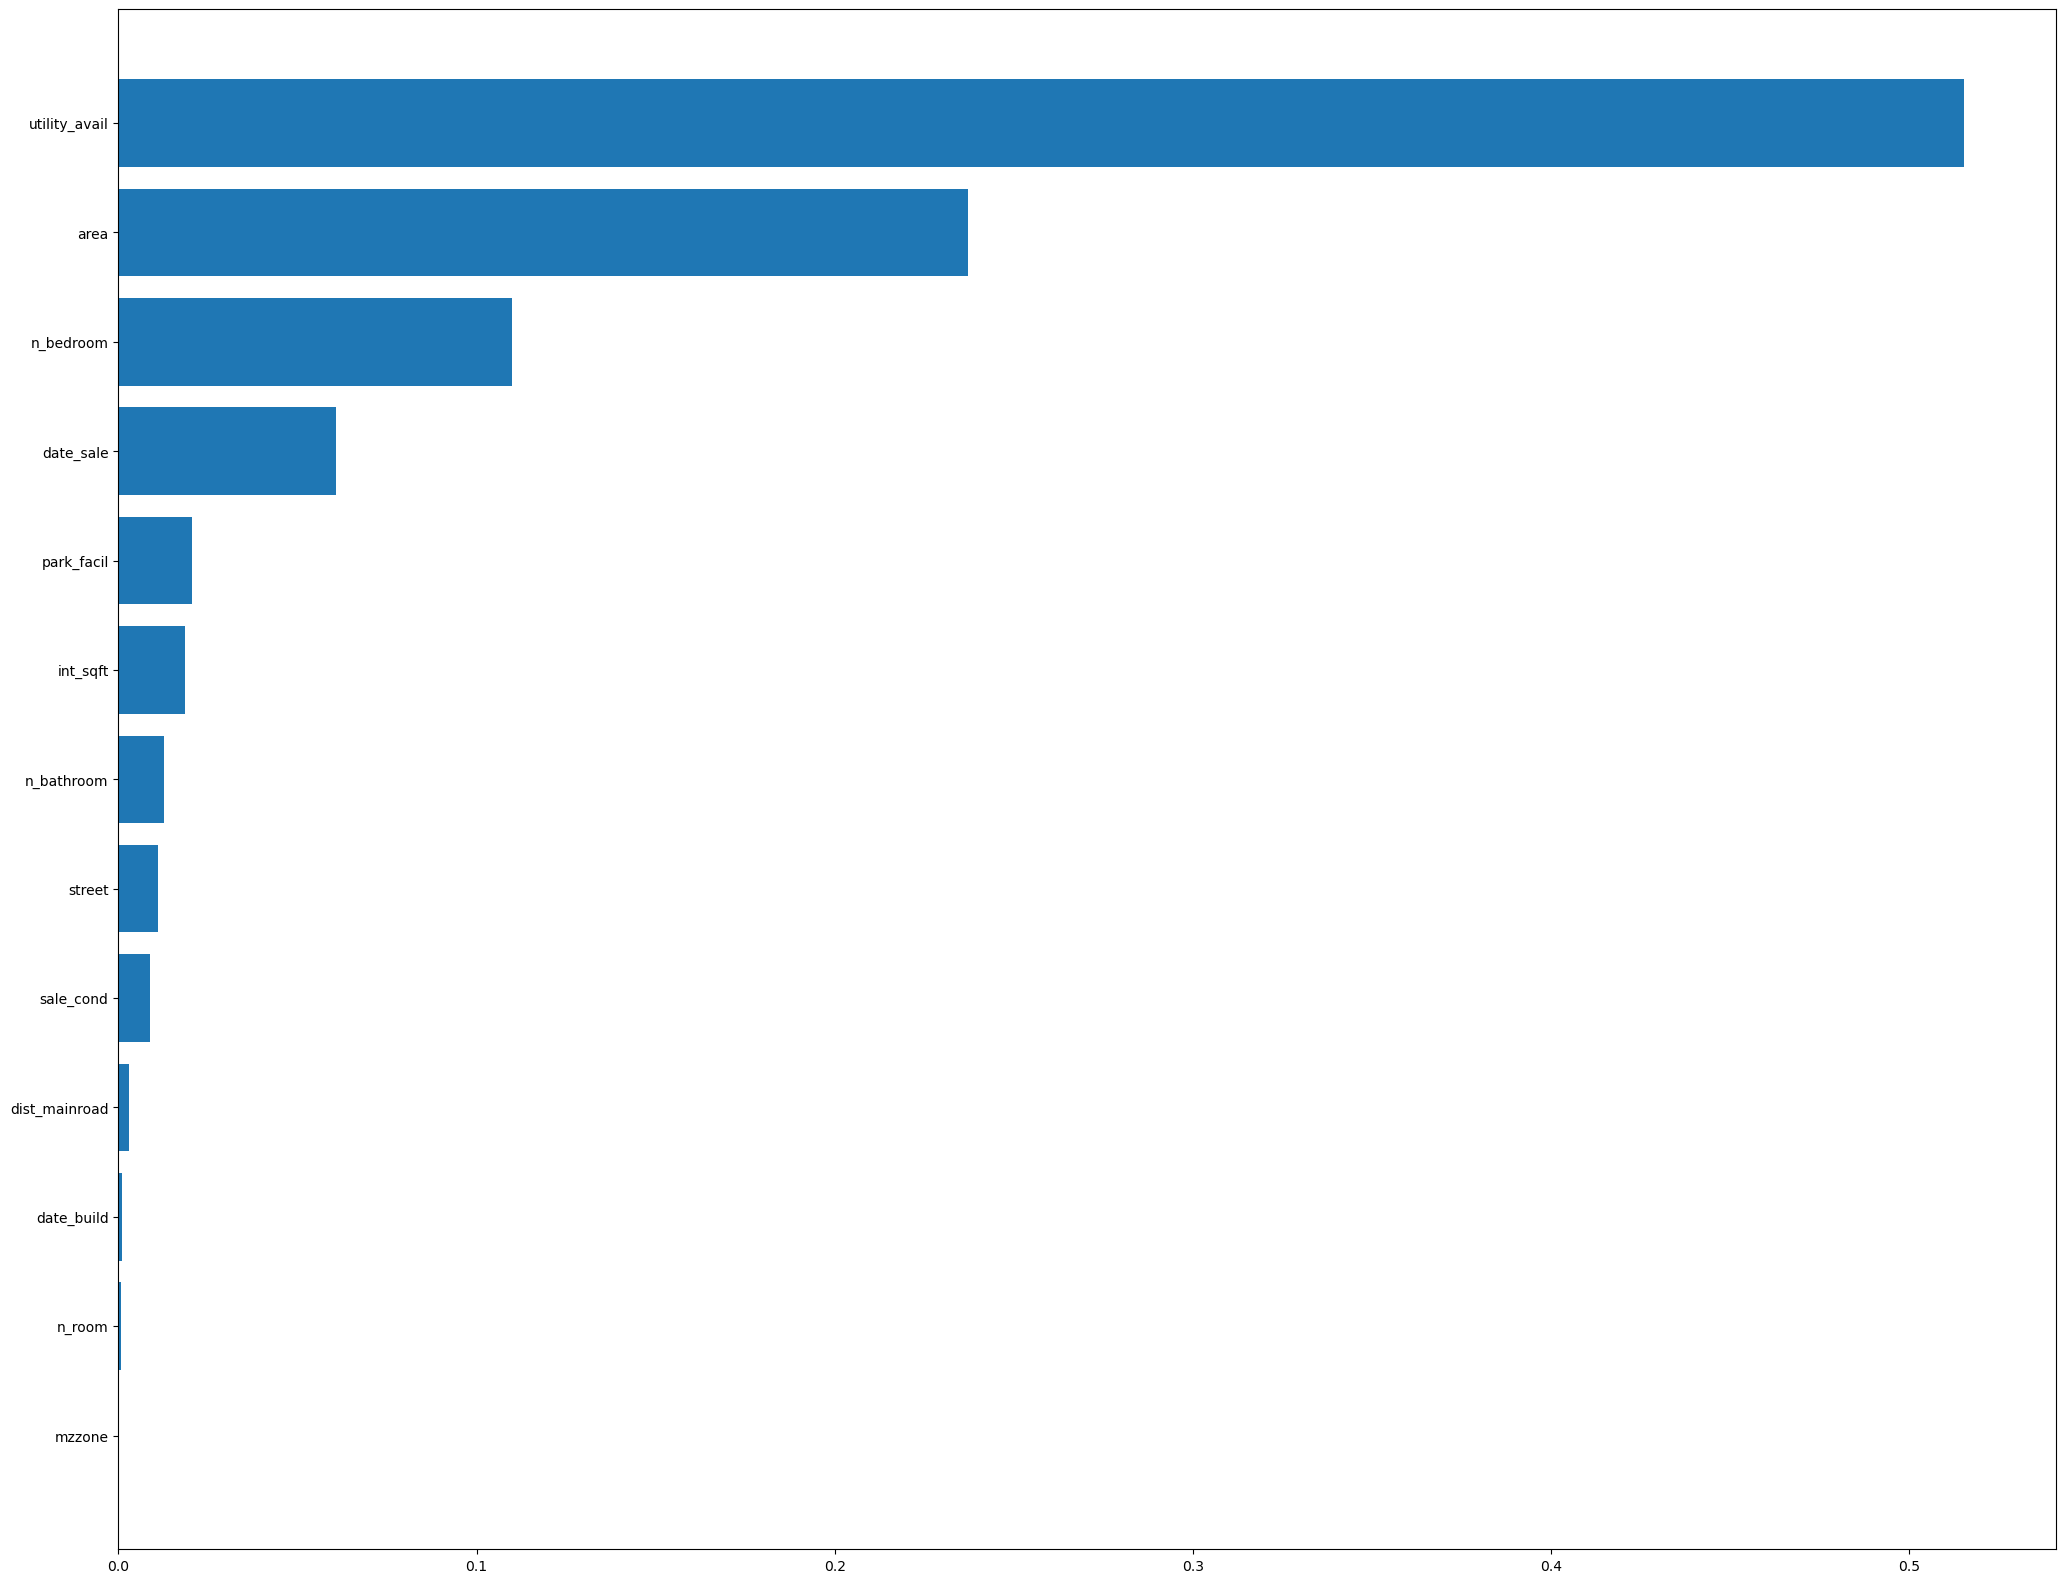

In [90]:
sorted_idx = x.feature_importances_.argsort()
plt.figure(figsize=(25,20))
plt.barh(df.columns[sorted_idx], x.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")
# plt.title("Feature Importance")
plt.show()

# Suggestions to Predict Chennai House Price:
## Based on the feature importance given by Best Machine Learning Algorithm(Extreme Gradient Boosting)-Person who's looking for Chennai house price value should Focus on the features of order given below to predict the Price value of the house :
### 1.Utility Availability
#### 2.Area
##### 3.No. of Bedrooms
###### 4.Date Sold
###### 5.Parking Facility
###### 6.Sq.ft Area
###### 7.No. of Bathrooms
###### All other amenities also equally affects the house prices. 